In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [2]:
with open('data/mnist/train-images-idx3-ubyte', 'rb') as f:
    buffer = f.read(16)
    head = struct.unpack('>iiii', buffer)
    print(head)
    buffer = f.read(head[1] * head[2] * head[3])
    data = struct.unpack('>{}B'.format(head[1] * head[2] * head[3]), buffer)

(2051, 60000, 28, 28)


In [3]:
len(data)

47040000

In [4]:
head[1] * head[2] * head[3]

47040000

In [5]:
imgs = np.reshape(data, (head[1], head[2], head[3]))

In [6]:
imgs.shape

(60000, 28, 28)

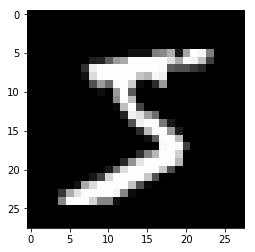

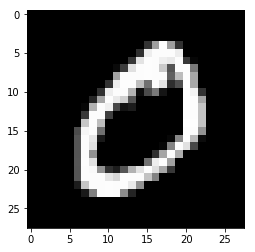

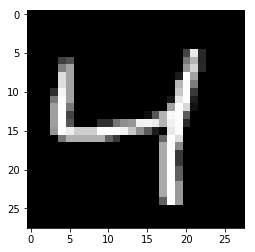

In [7]:
for i in range(3):
    plt.imshow(imgs[i], cmap='gray')
    plt.show()

In [8]:
with open('data/mnist/train-labels-idx1-ubyte', 'rb') as f:
    buffer = f.read(8)
    head = struct.unpack('>ii', buffer)
    print(head)
    buffer = f.read(head[1])
    data = struct.unpack('>{}B'.format(head[1]), buffer)

(2049, 60000)


In [9]:
y = np.array(data)

In [10]:
y.shape

(60000,)

In [11]:
y[:3]

array([5, 0, 4])

In [12]:
X = imgs.reshape(len(imgs), -1)

In [13]:
X.shape

(60000, 784)

In [14]:
from ML.knn import KNeighborsClassifier

In [15]:
clf = KNeighborsClassifier()

In [16]:
clf.fit(X, y)

In [17]:
clf.predict(X[:3,])

array([5, 0, 4])

In [18]:
with open('data/mnist/t10k-images-idx3-ubyte', 'rb') as f:
    buffer = f.read(16)
    head = struct.unpack('>iiii', buffer)
    print(head)
    buffer = f.read(head[1] * head[2] * head[3])
    data = struct.unpack('>{}B'.format(head[1] * head[2] * head[3]), buffer)
    imgs_test = np.reshape(data, (head[1], head[2], head[3]))

(2051, 10000, 28, 28)


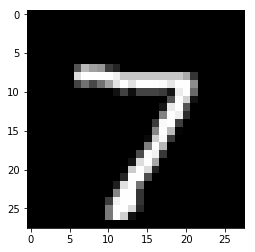

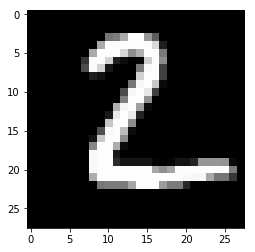

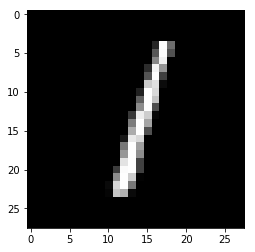

In [19]:
for i in range(3):
    plt.imshow(imgs_test[i], cmap='gray')
    plt.show()

In [20]:
X_test = imgs_test.reshape(len(imgs_test), -1)

In [21]:
X_test.shape

(10000, 784)

In [22]:
clf.predict(X_test[:3,])

array([7, 2, 1])